In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
crop = pd.read_csv(r"C:\Users\DELL\Downloads\Crop Recommendation (1).csv")
crop


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#To check how many null values are there in given dataset we use isnull function 
crop.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop['label'].value_counts()


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [9]:
scaler = StandardScaler()
crop[columns_to_standardize] = scaler.fit_transform(crop[columns_to_standardize])

In [10]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
column_to_encode = 'label'
encoder = LabelEncoder()
crop[column_to_encode] = encoder.fit_transform(crop[column_to_encode])

In [12]:
from sklearn.model_selection import train_test_split
X = crop.drop('label', axis=1)  # Replace 'target_variable' with the actual column name of the target variable
y = crop['label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from keras import models
from keras import layers
from keras.utils import to_categorical
num_classes = 22

onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_encoded = onehot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.values.reshape(-1, 1))



In [14]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(885, activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(22, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 

In [15]:
mc = ModelCheckpoint(filepath= "./best_model.h5",monitor = 'val_accuracy',
                     verbose= 1, save_best_only= True)

In [16]:
history = model.fit(X_train, y_train_encoded,
              validation_data = (X_test, y_test_encoded),
              epochs=300, batch_size=10, callbacks = mc)

Epoch 1/300
174/176 [============================>.] - ETA: 0s - loss: 0.8376 - accuracy: 0.7270
Epoch 1: val_accuracy improved from -inf to 0.89091, saving model to .\best_model.h5
176/176 [==============================] - 4s 18ms/step - loss: 0.8303 - accuracy: 0.7295 - val_loss: 0.4213 - val_accuracy: 0.8909
Epoch 2/300
175/176 [============================>.] - ETA: 0s - loss: 0.2450 - accuracy: 0.9137
Epoch 2: val_accuracy improved from 0.89091 to 0.95455, saving model to .\best_model.h5
176/176 [==============================] - 3s 16ms/step - loss: 0.2440 - accuracy: 0.9142 - val_loss: 0.1426 - val_accuracy: 0.9545
Epoch 3/300
175/176 [============================>.] - ETA: 0s - loss: 0.2099 - accuracy: 0.9309
Epoch 3: val_accuracy improved from 0.95455 to 0.96136, saving model to .\best_model.h5
176/176 [==============================] - 3s 17ms/step - loss: 0.2093 - accuracy: 0.9312 - val_loss: 0.1088 - val_accuracy: 0.9614
Epoch 4/300
174/176 [============================>.]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15716\4245619702.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(history.history['val_accuracy'], 'go--', c="red")
C:\Users\DELL\AppData\Local\Temp\ipykernel_15716\4245619702.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(history.history['val_loss'], 'go--', c="red")


Text(0.5, 1.0, 'loss\xa0vs\xa0val_loss')

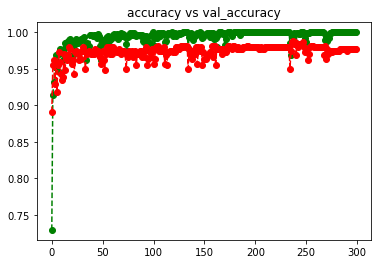

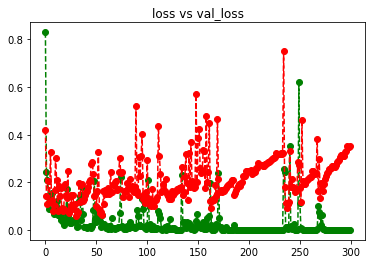

In [17]:
plt.plot(history.history['accuracy'], 'go--')
plt.plot(history.history['val_accuracy'], 'go--', c="red")

plt.title("accuracy vs val_accuracy")

plt.figure()

plt.plot(history.history['loss'], 'go--')
plt.plot(history.history['val_loss'], 'go--', c="red")

plt.title("loss vs val_loss")

In [18]:
final_model = r"C:\Users\DELL\Downloads\best_model.h5"

In [19]:
# Get the unique labels
unique_labels = crop['label'].unique()

# Print the unique labels
for label in unique_labels:
    print(label)

20
11
3
9
18
13
14
2
10
19
1
12
7
21
15
0
16
17
4
6
8
5


In [20]:
import tensorflow as tf
import pandas as pd

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\DELL\Downloads\best_model.h5")

# Define the crop labels
crop_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 
'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange',
'papaya', 'coconut', 'cotton', 'jute', 'coffee']

def predict_crop(nitrogen, phosphorous, potassium, temperature, humidity, ph, rainfall):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'Nitrogen': [nitrogen],
        'Phosphorous': [phosphorous],
        'Potassium': [potassium],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'ph':[ph],
        'Rainfall':[rainfall]
    })

    # Perform prediction
    prediction = model.predict(input_data)[0]
    crop_index = tf.argmax(prediction).numpy()
    predicted_crop = crop_labels[crop_index]

    return predicted_crop


In [21]:
predicted_crop = predict_crop(90, 42, 43, 20.87, 82.80, 6.50,202.93)
print(predicted_crop)


1/1 [==============================] - 0s 135ms/step
papaya
